What happens if we want to determine the statistical significance of two independent categorical groups of data?

This is where the Chi-squared test for independence is useful.

We'll be looking at data from the census in 1994.
Specifically, we are interested in the relationship between 'sex' and 'hours-per-week' worked. 


For the sake of this example, we'll convert the numerical column 'hours-per-week' into a categorical column using pandas. Then we'll assign 'sex' and 'hours_per_week_categories' to a new dataframe.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

cols = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 
        'marital-status','occupation','relationship', 'race','sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv('census.csv', names=cols)
data.head()

,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Create a column for work hour categories.
def process_hours(df):
    cut_points = [0,9,19,29,39,49,1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points, labels=label_names)
    return df

data = process_hours(data)
workhour_by_sex = data[['sex', 'hours_per_week_categories']]
workhour_by_sex.head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [5]:
# Create a column for work hour categories.
def process_hours(df):
    cut_points = [0,9,19,29,39,49,1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points, labels=label_names)
    return df

data = process_hours(data)
workhour_by_sex = data[['sex', 'hours_per_week_categories']]
workhour_by_sex.head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [6]:
workhour_by_sex['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

For relationship between 'sex' and 'hours_per_week_categories', we need Chi-squared test.

H0:There is NO statistically significant relationship between sex and the # of hours per week worked

Ha:There is statistically significant relationship between sex and the # of hours per week worked

# Constructing the Contingency Table
Format the data into a frequency count table. This is called a Contingency Table.

We can accomplish this by using the pd.crosstab() function in pandas.

In [17]:
contingency_table = pd.crosstab(
    workhour_by_sex['sex'],
    workhour_by_sex['hours_per_week_categories'],
    margins = True
)

In [18]:
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,6462,1246,18336,3667,458,2392,32561


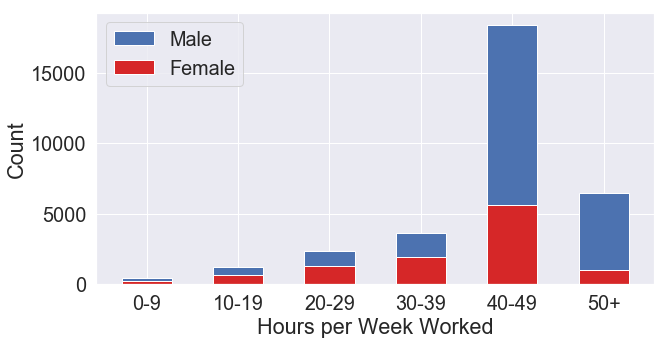

In [22]:
# Visualizing the Contingency Table with a Stacked Bar Chart

#Assigns the frequency values
malecount = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["0-9","10-19","20-29","30-39","40-49","50+"]
p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()

In [23]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]], dtype=int64)

In [25]:
from scipy import stats

chi2_stat, pvalue, dof = stats.chi2_contingency(f_obs)[0:3]

In [26]:
print("Chi Squared Statistic: {}".format(chi2_stat))
print("p value: {}".format(pvalue))
print("Degrees of Freedom: {}".format(dof))

Chi Squared Statistic: 2287.190943926107
p value: 0.0
Degrees of Freedom: 5


Now we are ready to look into the Chi-squared distribution table from below
http://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm

The cut off for a p-value of 0.05 with degree of freedom of 5 was 11.070. 

Our X2 statistic was so large that the p-value is approximately zero. 
So we have evidence against the null hypothesis.

Conclusions:
With a p-value < 0.05 , we can reject the null hypothesis. 
There is definitely some sort of relationship between 'sex' and the 'hours-per-week' column. 
We don't know what this relationship is, but we do know that these two variables are not independent of each other.